In [29]:
def DS_heatmaps(task):
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib as plt
    %matplotlib inline
    df=pd.read_csv('/Users/aporter1350/Desktop/MSC_Alexis/analysis/output/results/SVC/acc/DS/'+task+'_accTable_diff_sub.csv')
    df.set_index('Test_variables', inplace=True)
    ax=sns.heatmap(df, annot=True)
    ax.set_title(task)
    fig=ax.get_figure()
    fig.savefig('/Users/aporter1350/Desktop/MSC_Alexis/analysis/output/images/SVC/acc/DS/' +task+ '_acc.png', bbox_inches='tight')
    
    

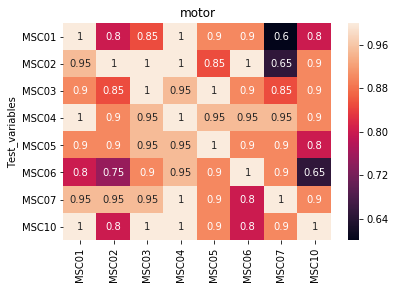

In [30]:
taskName=['mem','mixed','motor']
for t in taskName:
    DS_heatmaps(t)

In [19]:
def SS_heatmaps(subid):
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib as plt
    %matplotlib inline
    df=pd.read_csv('/Users/aporter1350/Desktop/MSC_Alexis/analysis/output/results/SVC/acc/SS/' +subid+ '_accTable_same_sub.csv')
    df.set_index('Test_variables', inplace=True)
    ax=sns.heatmap(df, annot=True)
    fig=ax.get_figure()
    fig.savefig('/Users/aporter1350/Desktop/MSC_Alexis/analysis/output/images/SVC/acc/SS/' +subid+ '_acc.png', bbox_inches='tight')
    

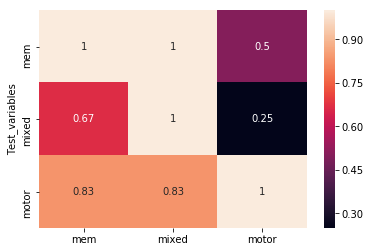

In [20]:
subs=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']
for sub in subs:
    SS_heatmaps(sub)

In [1]:
def SS_concat():
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    %matplotlib inline
    #concatenate all dataframes
    accTable=[]
    subList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']
    taskList=['mem','mixed','motor']
    for i in subList:
        df=pd.read_csv('/Users/aporter1350/Desktop/MSC_Alexis/analysis/output/results/SVC/acc/SS/' +i+ '_accTable_same_sub.csv')
        df['sub']=i
        accTable.append(df)
    results=pd.concat(accTable)
    grouped_df=results.groupby('Test_variables')
    for j in taskList:
        task_df=grouped_df.get_group(j)
        task_df.set_index('sub', inplace=True)
        task_df.drop(columns=[j, 'Test_variables'], inplace=True)
        plt.figure() 
        ax=sns.heatmap(task_df, annot=True)
        ax.set_title('Testing ' + j)
        fig=ax.get_figure()
        fig.savefig('/Users/aporter1350/Desktop/MSC_Alexis/analysis/output/images/SVC/acc/SS/' +j+ '_acc_heatmap.png', bbox_inches='tight')


/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


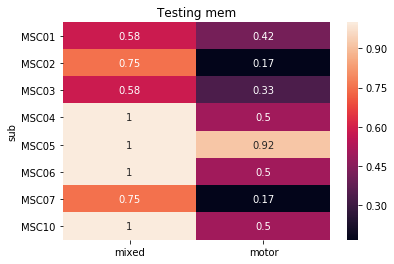

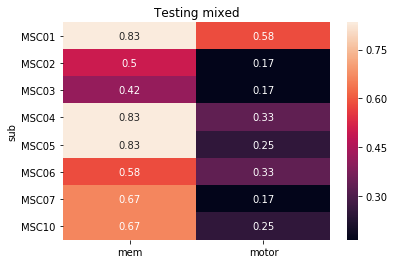

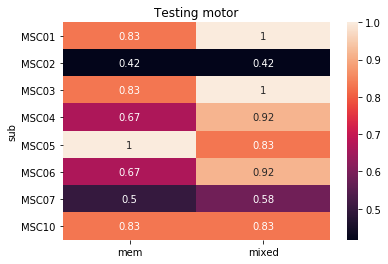

In [2]:
SS_concat()